<a href="https://colab.research.google.com/github/jinx1016/Learner-s-Space-24--ML/blob/main/Week1_LS_DS(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem_01


In [1]:
import numpy as np

# Task 1: Create a 5x5 array with random integers between 1 and 100
array = np.random.randint(1, 101, size=(5, 5))
print("Original Array:")
print(array)

# Task 2: Extract the middle element
middle_element = array[2, 2]
print("\nMiddle Element:")
print(middle_element)

# Task 3: Calculate the mean of each row
row_means = np.mean(array, axis=1)
print("\nMean of Each Row:")
print(row_means)

# Task 4: Create a new array with elements greater than the overall mean
overall_mean = np.mean(array)
print("\nOverall Mean:")
print(overall_mean)
greater_than_mean = array[array > overall_mean]
print("\nElements Greater Than Overall Mean:")
print(greater_than_mean)

# Task 5: Function to get spiral order of a matrix
def numpy_spiral_order(matrix):
    result = []
    while matrix.size:
        result += matrix[0].tolist()  # Take the first row
        matrix = matrix[1:].T[::-1]  # Remove the first row and rotate the rest counter-clockwise
    return result

# Example usage of numpy_spiral_order
spiral_order = numpy_spiral_order(array)
print("\nSpiral Order of the Array:")
print(spiral_order)


Original Array:
[[14 83 66 83 99]
 [17 37 44 62 19]
 [24 92 86 97 70]
 [ 5 53 24 25  3]
 [15 42 59  1 90]]

Middle Element:
86

Mean of Each Row:
[69.  35.8 73.8 22.  41.4]

Overall Mean:
48.4

Elements Greater Than Overall Mean:
[83 66 83 99 62 92 86 97 70 53 59 90]

Spiral Order of the Array:
[14, 83, 66, 83, 99, 19, 70, 3, 90, 1, 59, 42, 15, 5, 24, 17, 37, 44, 62, 97, 25, 24, 53, 92, 86]


Problem_02


DataFrame sorted by global_sales:
                                                   Name Platform    Year  \
6109                                         Wii Sports      Wii  2006.0   
122                                   Super Mario Bros.      NES  1985.0   
8315                                     Mario Kart Wii      Wii  2008.0   
9743                                  Wii Sports Resort      Wii  2009.0   
705                            Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
10978       Military History: Commander - Europe at War       DS  2009.0   
7971            Puzzle Quest: Challenge of the Warlords      PSP  2007.0   
7972                         Race Driver: Create & Race       DS  2007.0   
10854                                   Cross Edge Dash     X360  2009.0   
9650   SCORE International Baja 1000: The Official Game      PS2  2008.0   

              Genre            Publisher  NA_Sales  E

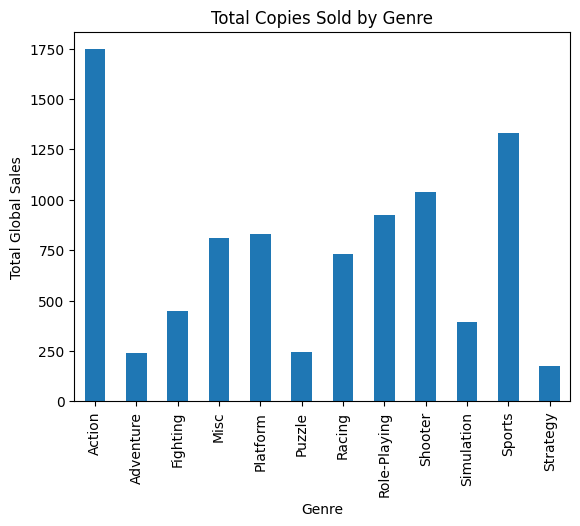


Filtered Grand Theft Auto games DataFrame:
                                                    Name Platform    Year  \
999                                     Grand Theft Auto       PS  1997.0   
1290                                  Grand Theft Auto 2       PS  1998.0   
1469      Grand Theft Auto: Mission Pack #1, London 1969       PS  1998.0   
2323                                Grand Theft Auto III      PS2  2001.0   
2805                         Grand Theft Auto: Vice City      PS2  2002.0   
3563                                Grand Theft Auto III       PC  2002.0   
3639   Rockstar Games Double Pack: Grand Theft Auto I...       XB  2003.0   
3688   Rockstar Games Double Pack: Grand Theft Auto I...      PS2  2003.0   
4356                         Grand Theft Auto: Vice City       PC  2003.0   
4405                       Grand Theft Auto: San Andreas      PS2  2004.0   
4704                                    Grand Theft Auto      GBA  2004.0   
5173              Grand Theft Au

<ipython-input-2-4bb30f5b1d6a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_filtered['EU_JP_Sales'] = gta_games[['EU_Sales', 'JP_Sales']].sum(axis=1)


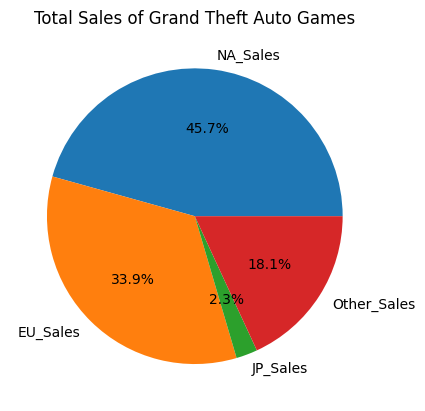

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = '/content/videogamesales.csv'
df = pd.read_csv(file_path)

# 1. Add 'global_sales' column and sort the DataFrame
df['global_sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
df_sorted = df.sort_values(by='global_sales', ascending=False)
print("DataFrame sorted by global_sales:")
print(df_sorted)

# 2. Plot the total number of copies sold of each genre globally
genre_sales = df.groupby('Genre')['global_sales'].sum()
genre_sales.plot(kind='bar', title='Total Copies Sold by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales')
plt.show()

# 3. Filter 'Grand Theft Auto' games and display required information
gta_games = df[df['Name'].str.contains('Grand Theft Auto')]
gta_filtered = gta_games[['Name', 'Platform', 'Year']]
gta_filtered['EU_JP_Sales'] = gta_games[['EU_Sales', 'JP_Sales']].sum(axis=1)
print("\nFiltered Grand Theft Auto games DataFrame:")
print(gta_filtered)

# 4. Display a pie chart of total sales of all Grand Theft Auto games combined
gta_total_sales = gta_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
gta_total_sales.plot(kind='pie', autopct='%1.1f%%', title='Total Sales of Grand Theft Auto Games')
plt.ylabel('')
plt.show()
